<a href="https://colab.research.google.com/github/Nil1927/Customer-Analytics-for-chips-category/blob/main/Copy_of_Uber_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Uber Trip Data Analysis



##### **Project Type**    - EDA
##### **Contribution**    - Nilkanth Deshpande

# **Project Summary -**

This project focuses on generating actionable insights for Uber’s business operations by analyzing key factors such as pickup points, trip status, and request/drop timestamps. The goal is to support strategic decision-making in areas like demand forecasting, cost control, resource allocation, and enhancing customer experience to strengthen brand value.

Data Preparation and Analysis:

The dataset was pre-processed to ensure quality analysis. Additional variables were engineered to enable deeper insights. Various visualization techniques—including histograms, bar charts, line charts, pie charts, scatter plots, and clustered bar charts—were employed for exploratory data analysis (EDA).

Analytical Focus:

Key aspects considered in the analysis include:

Time of day

Trip completion or cancellation status

Pickup location trends

While the available data offers foundational insights, it may not be fully conclusive for direct business action. However, the findings can guide more detailed descriptive or predictive analyses using extended datasets.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

#### **Define Your Business Objective?**

Answer Here.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Dataset Loading

In [ ]:
# Load Dataset
df = pd.read_csv(r"/content/sample_data/uber_request_data.csv")

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

,Request_id,Pickup_point,Driver_id,Status,request_timestamp,drop_timestamp
0,619,Airport,1,Trip Completed,2016/07/11 11:51:00,2016/07/11 13:00:00
1,867,Airport,1,Trip Completed,2016/07/11 17:57:00,2016/07/11 18:47:00
2,1807,City,1,Trip Completed,2016/07/12 09:17:00,2016/07/12 09:58:00
3,2532,Airport,1,Trip Completed,2016/07/12 21:08:00,2016/07/12 22:03:00
4,3112,City,1,Trip Completed,2016/07/13 08:33:00,2016/07/13 09:25:00


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

(6745, 6)

In [ ]:
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

Number of rows: 6745
Number of columns: 6


### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Request_id         6745 non-null   int64 
 1   Pickup_point       6745 non-null   object
 2   Driver_id          6745 non-null   int64 
 3   Status             6745 non-null   object
 4   request_timestamp  6745 non-null   object
 5   drop_timestamp     6745 non-null   object
dtypes: int64(2), object(4)
memory usage: 316.3+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count

duplicate_count = df.duplicated(subset='Request_id', keep=False).sum()
print(f"Total duplicate request_ids: {duplicate_count}")

Total duplicate request_ids: 0


### What did you know about your dataset?

The dataset is stored in a structured format as a CSV file. It contains 6 variables and 6,745 records. The variables are of different data types, and some are in incorrect formats that need to be cleaned. Additionally, there are no duplicate values based on the dataset's unique column.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
print(df.dtypes)

Request_id            int64
Pickup_point         object
Driver_id             int64
Status               object
request_timestamp    object
drop_timestamp       object
dtype: object


In [ ]:
# Dataset Describe
df.describe()

,Request_id,Driver_id
count,6745.000000,6745.000000
mean,3384.644922,90.764715
std,1955.099667,99.132418
min,1.000000,0.000000
25%,1691.000000,0.000000
50%,3387.000000,53.000000
75%,5080.000000,177.000000
max,6766.000000,300.000000


### Variables Description

Answer Here

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.

for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")

Request_id: 6745 unique values
Pickup_point: 2 unique values
Driver_id: 301 unique values
Status: 3 unique values
request_timestamp: 4016 unique values
drop_timestamp: 4054 unique values


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# 3.1 Null or missing values

df.isnull().sum()

,0
Request_id,0
Pickup_point,0
Driver_id,0
Status,0
request_timestamp,0
drop_timestamp,0


In [ ]:
# 3.2 checking the data types of varaibles

df.dtypes

,0
Request_id,int64
Pickup_point,object
Driver_id,int64
Status,object
request_timestamp,object
drop_timestamp,object


In [ ]:
df['request_timestamp'] = pd.to_datetime(df['request_timestamp'])

In [ ]:
df['drop_timestamp'] = pd.to_datetime(df['drop_timestamp'])

In [ ]:
## 4. Creating date and time column separately

df['request_date'] = df['request_timestamp'].dt.date
df['request_time'] = df['request_timestamp'].dt.time

In [ ]:
df['drop_date'] = df['drop_timestamp'].dt.date
df['drop_time'] = df['drop_timestamp'].dt.time

In [ ]:
df

,Request_id,Pickup_point,Driver_id,Status,request_timestamp,drop_timestamp,request_date,request_time,drop_date,drop_time
0,619,Airport,1,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,2016-07-11,11:51:00,2016-07-11,13:00:00
1,867,Airport,1,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,2016-07-11,17:57:00,2016-07-11,18:47:00
2,1807,City,1,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016-07-12,09:17:00,2016-07-12,09:58:00
3,2532,Airport,1,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,2016-07-12,21:08:00,2016-07-12,22:03:00
4,3112,City,1,Trip Completed,2016-07-13 08:33:00,2016-07-13 09:25:00,2016-07-13,08:33:00,2016-07-13,09:25:00
...,...,...,...,...,...,...,...,...,...,...
6740,6745,City,0,No Cars Available,2016-07-15 23:49:00,2016-07-15 23:49:00,2016-07-15,23:49:00,2016-07-15,23:49:00
6741,6752,Airport,0,No Cars Available,2016-07-15 23:50:00,2016-07-15 23:50:00,2016-07-15,23:50:00,2016-07-15,23:50:00
6742,6751,City,0,No Cars Available,2016-07-15 23:52:00,2016-07-15 23:52:00,2016-07-15,23:52:00,2016-07-15,23:52:00
6743,6754,City,0,No Cars Available,2016-07-15 23:54:00,2016-07-15 23:54:00,2016-07-15,23:54:00,2016-07-15,23:54:00


In [ ]:
## 3.3 Creating day name column
df['day'] = df['request_timestamp'].dt.day_name()

In [ ]:
## 3.4 creating hour column when ride was requested

df['hour'] = df['request_timestamp'].dt.hour

In [ ]:
## 3.5 creating variable for trip duration in minutes

df['trip_duration_minutes'] = (df['drop_timestamp']-df['request_timestamp']).dt.total_seconds() / 60

In [ ]:
df.dtypes

,0
Request_id,int64
Pickup_point,object
Driver_id,int64
Status,object
request_timestamp,datetime64[ns]
drop_timestamp,datetime64[ns]
request_date,object
request_time,object
drop_date,object
drop_time,object


### What all manipulations have you done and insights you found?

Several changes have been made to the dataset, as outlined below:

The data types of the request_timestamp and drop_timestamp columns have been converted to datetime format to facilitate time-based operations.

The Request_id column has been converted to text to make visualizations more compact.

Separate columns for date and time have been created for future use. Also, new variables day name and trip request hour has been added to dataset.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [ ]:
## Histogram to check skewness of hourly rides

trips = df[df['Status'] == 'Trip Completed']
trips

,Request_id,Pickup_point,Driver_id,Status,request_timestamp,drop_timestamp,request_date,request_time,drop_date,drop_time,day,hour,trip_duration_minutes
0,619,Airport,1,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,2016-07-11,11:51:00,2016-07-11,13:00:00,Monday,11,69.0
1,867,Airport,1,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,2016-07-11,17:57:00,2016-07-11,18:47:00,Monday,17,50.0
2,1807,City,1,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016-07-12,09:17:00,2016-07-12,09:58:00,Tuesday,9,41.0
3,2532,Airport,1,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,2016-07-12,21:08:00,2016-07-12,22:03:00,Tuesday,21,55.0
4,3112,City,1,Trip Completed,2016-07-13 08:33:00,2016-07-13 09:25:00,2016-07-13,08:33:00,2016-07-13,09:25:00,Wednesday,8,52.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2826,1315,Airport,300,Trip Completed,2016-07-11 22:54:00,2016-07-11 23:35:00,2016-07-11,22:54:00,2016-07-11,23:35:00,Monday,22,41.0
2827,2924,City,300,Trip Completed,2016-07-13 06:31:00,2016-07-13 07:20:00,2016-07-13,06:31:00,2016-07-13,07:20:00,Wednesday,6,49.0
2828,3324,Airport,300,Trip Completed,2016-07-13 12:33:00,2016-07-13 13:16:00,2016-07-13,12:33:00,2016-07-13,13:16:00,Wednesday,12,43.0
2829,3935,Airport,300,Trip Completed,2016-07-13 22:26:00,2016-07-13 23:43:00,2016-07-13,22:26:00,2016-07-13,23:43:00,Wednesday,22,77.0


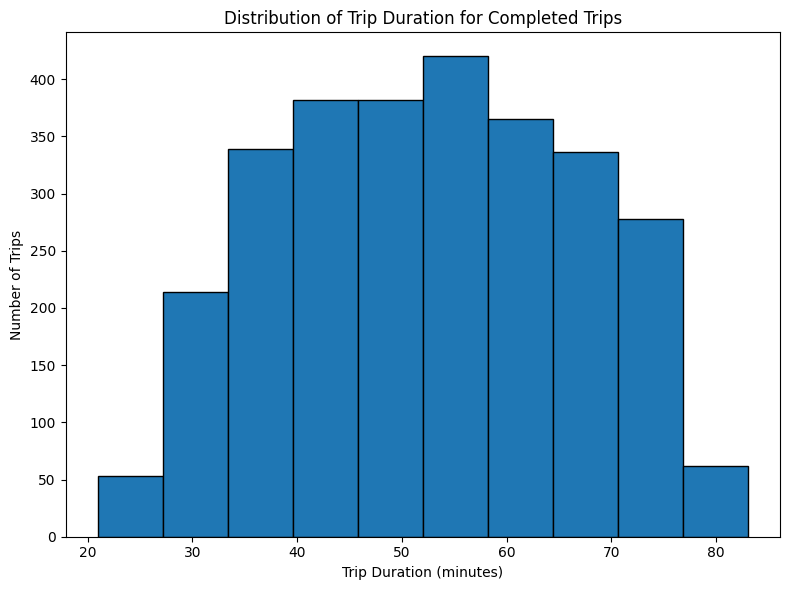

In [ ]:
## Code to plot Histogram

plt.figure(figsize=(8, 6))

plt.hist(trips['trip_duration_minutes'], bins=10, edgecolor='black')


plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Number of Trips')
plt.title('Distribution of Trip Duration for Completed Trips')



plt.tight_layout()
plt.show()

1. Why did you pick the specific chart?

The histogram clearly highlights the presence of skewness in the trip duration data. Addressing this skewness through appropriate data transformation techniques would help improve the quality and accuracy of subsequent analyses.



##### 2. What is/are the insight(s) found from the chart?

The histogram indicates that trip durations are evenly distributed, suggesting a balanced dataset. This uniformity enhances the reliability of further analyses, as it reduces the risk of bias and supports more accurate, data-driven insights.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

There are certain advantage of Hitsogram created here.

- Balanced data enables optimization of key operational aspects such as ride duration, ride acceptance, and cancellation management by providing a clearer understanding of usage patterns. It also reduces the likelihood of generating misleading insights, thereby supporting the development of more effective and data-driven strategies for future planning.

CHART 2 - Box Plot

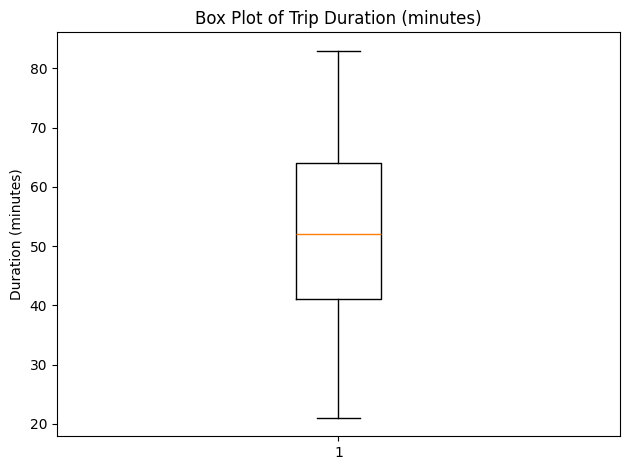

In [ ]:
## box plot

plt.boxplot(trips['trip_duration_minutes'])
plt.title('Box Plot of Trip Duration (minutes)')
plt.ylabel('Duration (minutes)')


plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Box plots are valuable for identifying unusual data points (outliers) that can be addressed or removed before conducting any form of analysis. Additionally, box plots are non-parametric, meaning they do not assume any specific data distribution. This makes them a robust tool for exploring and preparing datasets across a wide range of analytical applications.

##### 2. What is/are the insight(s) found from the chart?



The box plot clearly indicates that there are no outliers present in the trip duration variable. Therefore, no modifications are required for this variable at this stage of the analysis.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This process of outlier detection reduces the risk of inaccurate or misleading insights, thereby minimizing the chances of negative outcomes in business decision-making. As a result, it supports more effective and data-driven strategies for optimizing operations and overall business performance.

Chart 3 _ Bar chart for every day trips

In [ ]:
### 3. Bar chart based on daily trips

daily_requets = df.groupby('day')['Request_id'].count().reset_index(name='total_requests')

/tmp/ipython-input-28-1298320395.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='day', y='total_requests', data=daily_requets, palette='Set2')


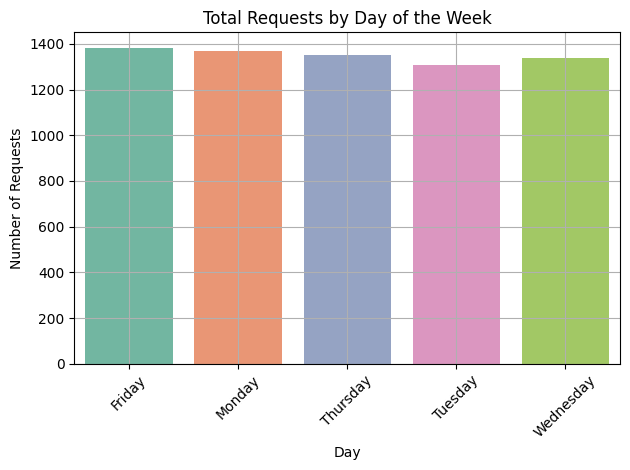

In [ ]:

sns.barplot(x='day', y='total_requests', data=daily_requets, palette='Set2')

plt.title('Total Requests by Day of the Week')
plt.xlabel('Day')
plt.ylabel('Number of Requests')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show();

##### 1. Why did you pick the specific chart?

The bar chart was chosen because it effectively represents categorical variables in a clear and interpretable manner. It allows users to quickly compare values across different categories and derive meaningful insights with ease.

##### 3. Will the gained insights help creating a positive business impact?


##### 1. 2. What is/are the insight(s) found from the chart?

The demand for taxis remains relatively consistent throughout the week. However, Fridays experience a noticeable increase in demand, likely due to the start of the weekend. Similarly, Mondays also show higher demand as they mark the beginning of the workweek. In contrast, midweek days (Tuesday to Thursday) tend to have comparatively lower taxi requirements.



##### 3. Will the gained insights help creating a positive business impact?

The above graphical representation illustrates day-wise business demand, which can be instrumental in developing targeted business strategies. It also enables more efficient fleet management, ultimately contributing to improved operational performance and positive business growth.

Chart 4: Pir chart for distribution of trips from pick up points

In [ ]:
## Pie chart for pickup points

requets_pickpoint = df.groupby('Pickup_point')['Request_id'].count().reset_index(name='total_requests')
requets_pickpoint

,Pickup_point,total_requests
0,Airport,3238
1,City,3507


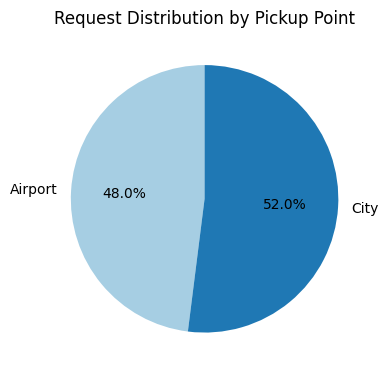

In [ ]:
plt.figure(figsize=(4, 4))
plt.pie(requets_pickpoint['total_requests'],
        labels=requets_pickpoint['Pickup_point'],
        autopct='%1.1f%%',
        startangle=90,
        colors=plt.cm.Paired.colors)

plt.title('Request Distribution by Pickup Point')
plt.tight_layout()
plt.show();

##### 1. Why did you pick the specific chart?

The pie chart provides a clear and concise visualization of categorical data distribution. In this case, it helps identify which pickup channel contributes most significantly to business generation, offering valuable insight for strategic planning.

##### 2. What is/are the insight(s) found from the chart?

The demand for taxis from both the Airport and the City is nearly equal, with each contributing approximately 50% to the total. This indicates that both pickup channels play an equally significant role in overall business generation.


##### 3. Will the gained insights help creating a positive business impact?

The insights derived from the pie chart can support business optimization by enabling effective fleet management across both pickup points. This approach helps reduce the risk of missed opportunities and ensures balanced service coverage, ultimately enhancing customer satisfaction and operational efficiency.

CHART 5:  Percenatge of trips by status of trips

In [ ]:
## pie chart for trip status

trip_status = df.groupby('Status')['Request_id'].count().reset_index(name='total_requests')
trip_status

,Status,total_requests
0,Cancelled,1264
1,No Cars Available,2650
2,Trip Completed,2831


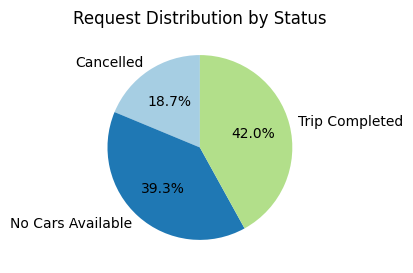

In [ ]:
plt.figure(figsize=(4, 4))
plt.pie(trip_status['total_requests'],
        labels=trip_status['Status'],
        autopct='%1.1f%%',
        startangle=90,
        colors=plt.cm.Paired.colors)

plt.title('Request Distribution by Status')
plt.tight_layout()
plt.show();

##### 1. Why did you pick the specific chart?

The pie chart offers a clear and concise visualization of the categorical data distribution. In this case, it highlights the actual percentage of business that gets successfully converted, providing valuable insights to inform strategic planning and decision-making.

##### 2. What is/are the insight(s) found from the chart?

The chart clearly indicates that 42% of the total requested trips are successfully completed. Additionally, 18% of trips are being cancelled by either drivers or customers, which warrants further attention. Most notably, approximately 40% of the trips are cancelled due to unavailability of cars—a significant concern that poses a major challenge to business growth and customer satisfaction.

##### 3. Will the gained insights help creating a positive business impact?

The company can utilize these insights to plan more effective resource allocation and address the underlying reasons behind trip cancellations. By doing so, operational efficiency can be significantly improved. Additionally, aligning resource availability with demand will enhance service quality, leading to greater customer satisfaction and overall business performance.

CHART 6 :Bar chart: Number of trip requests and status of trip form pick up points

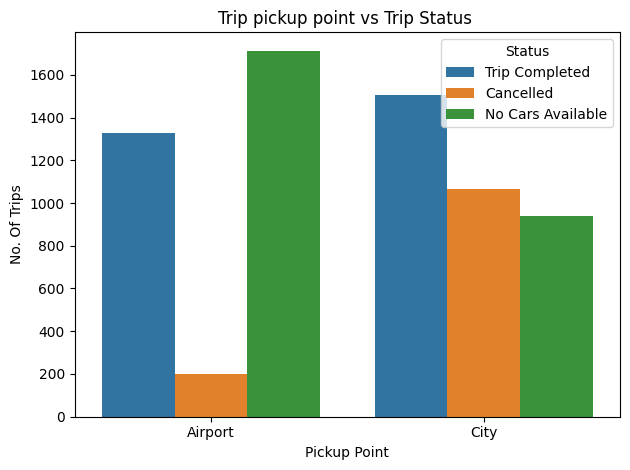

In [ ]:
# Chart - 2 visualization code
sns.countplot(x="Pickup_point",data=df,hue="Status")

plt.title('Trip pickup point vs Trip Status ')
plt.ylabel('No. Of Trips')
plt.xlabel('Pickup Point')

plt.tight_layout()
plt.show();

##### 1. Why did you pick the specific chart?

Reson to opt for bar chart as it shos perfect disctribution considering more than 2 variables.

##### 2. What is/are the insight(s) found from the chart?

A higher number of trip cancellations are observed from the city, whereas a significant portion of unattended trip requests due to vehicle unavailability originate from the airport. This highlights the need for location-specific operational strategies to improve service efficiency.

#### Chart - 7

In [ ]:
completed_trips = df[df['Status'] == 'Trip Completed']
completed_trips

,Request_id,Pickup_point,Driver_id,Status,request_timestamp,drop_timestamp,request_date,request_time,drop_date,drop_time,day,hour,trip_duration_minutes
0,619,Airport,1,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,2016-07-11,11:51:00,2016-07-11,13:00:00,Monday,11,69.0
1,867,Airport,1,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,2016-07-11,17:57:00,2016-07-11,18:47:00,Monday,17,50.0
2,1807,City,1,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016-07-12,09:17:00,2016-07-12,09:58:00,Tuesday,9,41.0
3,2532,Airport,1,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,2016-07-12,21:08:00,2016-07-12,22:03:00,Tuesday,21,55.0
4,3112,City,1,Trip Completed,2016-07-13 08:33:00,2016-07-13 09:25:00,2016-07-13,08:33:00,2016-07-13,09:25:00,Wednesday,8,52.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2826,1315,Airport,300,Trip Completed,2016-07-11 22:54:00,2016-07-11 23:35:00,2016-07-11,22:54:00,2016-07-11,23:35:00,Monday,22,41.0
2827,2924,City,300,Trip Completed,2016-07-13 06:31:00,2016-07-13 07:20:00,2016-07-13,06:31:00,2016-07-13,07:20:00,Wednesday,6,49.0
2828,3324,Airport,300,Trip Completed,2016-07-13 12:33:00,2016-07-13 13:16:00,2016-07-13,12:33:00,2016-07-13,13:16:00,Wednesday,12,43.0
2829,3935,Airport,300,Trip Completed,2016-07-13 22:26:00,2016-07-13 23:43:00,2016-07-13,22:26:00,2016-07-13,23:43:00,Wednesday,22,77.0


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?


Answer Here

#### Chart - 7 Line chart per hour

In [ ]:
hourly_trips= df.groupby('hour').size().reset_index()
hourly_trips.rename(columns={0: 'total_trips'}, inplace=True)
hourly_trips

,hour,total_trips
0,0,99
1,1,85
2,2,99
3,3,92
4,4,203
5,5,445
6,6,398
7,7,406
8,8,423
9,9,431


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

CHART 7 - Hourly line chart

In [ ]:
hourly_trips= df.groupby('hour').size().reset_index()

In [ ]:
hourly_trips.rename(columns={0: 'total_trips'}, inplace=True)
hourly_trips

,hour,total_trips
0,0,99
1,1,85
2,2,99
3,3,92
4,4,203
5,5,445
6,6,398
7,7,406
8,8,423
9,9,431


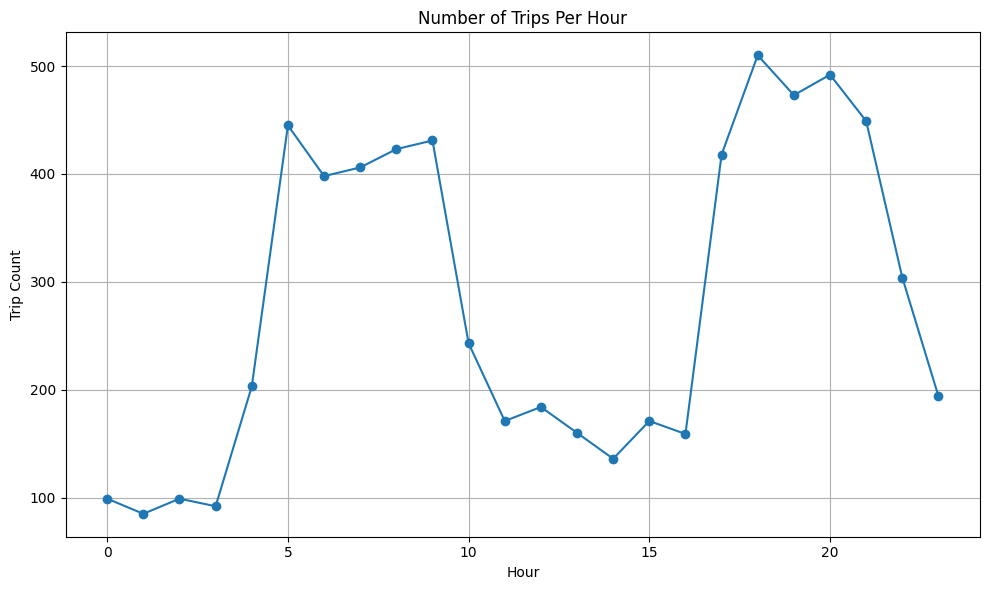

In [ ]:
## line chart plot

plt.figure(figsize=(10, 6))
plt.plot(hourly_trips.index, hourly_trips.total_trips, marker='o', linestyle='-')
plt.title('Number of Trips Per Hour')
plt.xlabel('Hour')
plt.ylabel('Trip Count')
plt.grid(True)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?



A line chart is ideal for visualizing trends and patterns over time. It effectively displays continuous data, such as hourly, daily, or monthly changes, allowing for clear observation of fluctuations, peaks, and dips. In this context, the line chart helps track variations in key metrics, such as the number of trips on an hourly basis, providing a clear view of demand fluctuations throughout the day.



##### 2. What is/are the insight(s) found from the chart?

The line chart indicates that peak demand—and therefore potential for higher revenue—occurs between 4 AM to 10 AM and again from 4 PM to 9 PM. In contrast, the afternoon hours show relatively lower demand, likely due to individuals being engaged in work, business, or personal commitments during that time.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Effectively managing the driver fleet during peak hours can lead to increased revenue generation and improved profitability. Ensuring vehicle availability during high-demand periods reduces customer wait times and strengthens trust between the company and its consumers.

However, if peak hours are not managed properly, it could result in missed business opportunities and customer dissatisfaction. Additionally, the significantly lower demand during non-peak hours can negatively impact cash flow, posing a challenge to consistent business growth. Strategic planning is therefore essential to balance supply and demand across all time periods.

Answer Here

CHART 8 : Line chart for daily trips

In [ ]:
### Line chart for daily trips

daily_trips= df.groupby('day').size().reset_index()
daily_trips.rename(columns={0:'total_trips_requested'},inplace= True)
daily_trips

,day,total_trips_requested
0,Friday,1381
1,Monday,1367
2,Thursday,1353
3,Tuesday,1307
4,Wednesday,1337


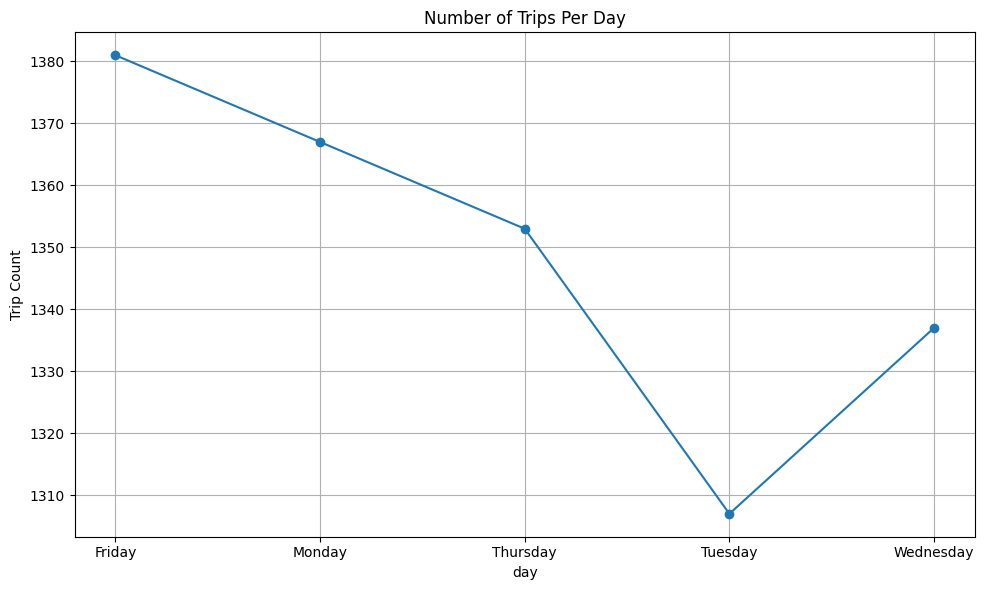

In [ ]:
## line chart

plt.figure(figsize=(10, 6))
plt.plot(daily_trips.day, daily_trips.total_trips_requested, marker='o', linestyle='-')
plt.title('Number of Trips Per Day')
plt.xlabel('day')
plt.ylabel('Trip Count')
plt.grid(True)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?



A line chart is ideal for visualizing trends and patterns over time, as it effectively represents continuous data such as hourly, daily, or monthly variations. It allows for clear observation of fluctuations, peaks, and dips. In this context, the line chart enables ongoing monitoring of daily trip requests—one of the key performance indicators—supporting data-driven decision-making and operational planning.  

##### 2. What is/are the insight(s) found from the chart?

Monday and Friday emerge as the busiest days for the business, with the highest number of ride requests from consumers. In contrast, demand tends to be significantly lower during midweek, particularly on Tuesdays and Wednesdays. This dip in activity should be addressed through targeted strategies to improve demand during these periods and ensure more balanced business performance throughout the week.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These insights play a crucial role in shaping effective business strategies by highlighting both high- and low-demand periods. By proactively addressing these variations, the organization can unlock additional business opportunities and improve overall performance.

A key point of concern is the significantly low demand observed on certain days. This issue requires focused attention to enhance operational efficiency and ensure more balanced utilization of resources throughout the week.

CHART 9 : Scatter plot for trip duration of comepleted trips

In [ ]:
com_trip= df[df['Status'] == 'Trip Completed']
avg_duration_hourly = com_trip.groupby('hour')['trip_duration_minutes'].mean().reset_index()
avg_duration_hourly

,hour,trip_duration_minutes
0,0,53.775000
1,1,57.560000
2,2,53.162162
3,3,51.264706
4,4,54.217949
5,5,51.545946
6,6,54.023952
7,7,52.632184
8,8,50.877419
9,9,53.404624


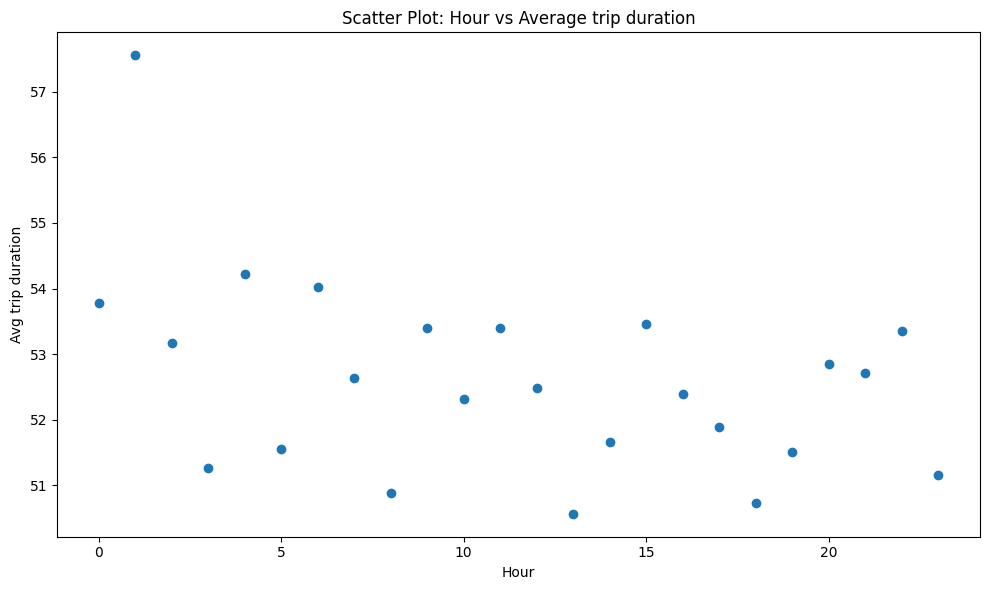

In [ ]:
### sctter plot

plt.figure(figsize=(10, 6))

plt.scatter(
    x=avg_duration_hourly['hour'],
    y=avg_duration_hourly['trip_duration_minutes']
)


plt.title('Scatter Plot: Hour vs Average trip duration')
plt.xlabel('Hour')
plt.ylabel('Avg trip duration')


plt.tight_layout()
plt.show();


##### 1. Why did you pick the specific chart?



The reason for opting for a scatter plot is its effectiveness in identifying relationships between two continuous variables. It also helps in spotting any unusual patterns or outliers related to key performance indicators. In this business case, analyzing the time taken to complete trips is essential from both operational and customer perspectives. The scatter plot provides clear visibility into how average trip durations vary by hour, enabling more informed decision-making for resource planning and service improvement.

##### 2. What is/are the insight(s) found from the chart?

From the scatter plot, we observe that during the morning peak hours, some rides take longer to complete, likely due to increased traffic congestion. Interestingly, although the number of rides is also high during the evening peak hours, drivers are completing trips in less time compared to the morning. Additionally, there are outlier rides that take significantly longer than expected, highlighting areas that require further investigation and attention from stakeholders.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding the differences in trip duration during peak hours through further analysis enables more effective business management. Processes that demonstrate strong performance can be identified and applied to other areas of the business to enhance overall efficiency and outcomes.

Additionally, pinpointing areas where performance deviates negatively is crucial. Addressing these issues with targeted solutions will help mitigate risks and reduce potential negative impacts on business growth.



CHART 10 : Violin Plot for trips

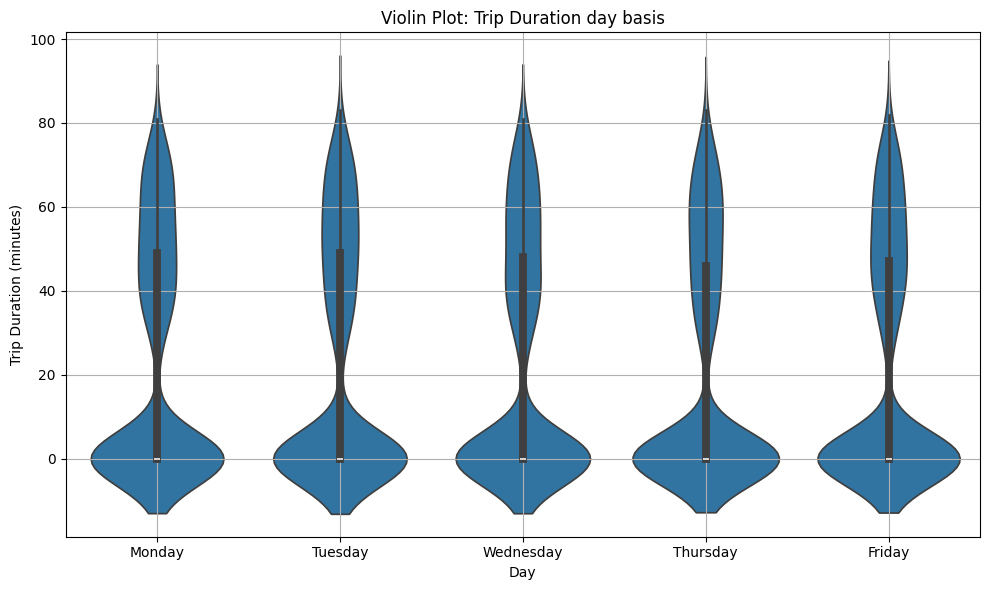

In [ ]:

## Violon plot

plt.figure(figsize=(10, 6))
sns.violinplot(x='day', y='trip_duration_minutes', data=df)

plt.title('Violin Plot: Trip Duration day basis')
plt.xlabel('Day')
plt.ylabel('Trip Duration (minutes)')
plt.grid(True)
plt.tight_layout()
plt.show();

##### 1. Why did you pick the specific chart?

Answer Here.A violin plot is chosen because it combines the benefits of a box plot and a kernel density plot, allowing for a comprehensive view of data distribution. It not only shows the summary statistics (median, quartiles, and outliers) like a box plot but also displays the full distribution shape of the data, highlighting where data points are concentrated.

##### 2. What is/are the insight(s) found from the chart?

The violin plot highlights that most completed trips are concentrated around shorter durations, indicating operational efficiency for a majority of rides. However, when this is compared with insights from the pie chart—which shows a significant number of trip cancellations occurring daily—it reveals a critical pain point for the organization. High cancellation rates, if not addressed, can lead to increased operational costs and hinder long-term efforts to build a strong, reliable brand image.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.



A significant percentage of trip requests are being cancelled—by drivers, customers, or due to unavailability of vehicles. High cancellation rates lead to poor customer experience, reduced revenue, and lower trust in the service. Over time, this can result in customer churn and damage the brand's reputation.



#### CHART 11 : Bar chart: Comparision between completed and cancelled trips

In [ ]:
hourly_trip_cancelled =df[df['Status'] == 'Cancelled'].groupby('hour').size().reset_index()
hourly_trip_cancelled.rename(columns={0:'total_cancelled_trips'},inplace=True)
hourly_trip_cancelled

,hour,total_cancelled_trips
0,0,3
1,1,4
2,2,5
3,3,2
4,4,51
5,5,176
6,6,145
7,7,169
8,8,178
9,9,175


In [ ]:
### no of trips compelted per hour

trip_counts = (
    df.groupby(['hour'])
    .size()
    .reset_index(name='trip_count')
)

In [ ]:
total_horly_trip = pd.merge(trip_counts, hourly_trip_cancelled, on='hour', how='inner')

In [ ]:
total_horly_trip

,hour,trip_count,total_cancelled_trips
0,0,99,3
1,1,85,4
2,2,99,5
3,3,92,2
4,4,203,51
5,5,445,176
6,6,398,145
7,7,406,169
8,8,423,178
9,9,431,175


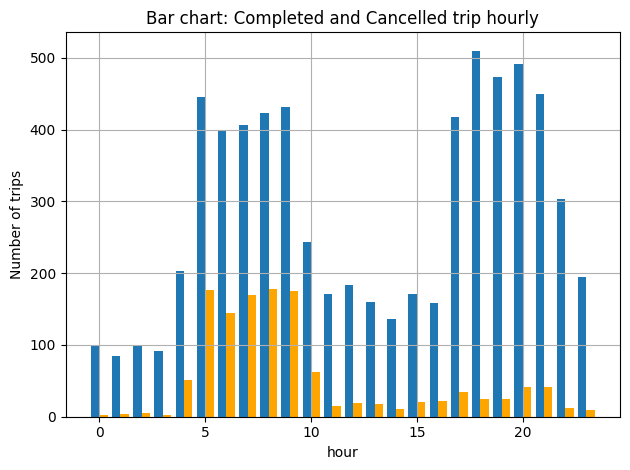

In [ ]:
hours = total_horly_trip['hour']
completed = total_horly_trip['trip_count']
cancelled = total_horly_trip['total_cancelled_trips']

# Bar width and positions
bar_width = 0.4
x = np.arange(len(hours))  # positions for each hour



plt.bar(x - bar_width/2, completed, width=bar_width, label='Completed Trips')
plt.bar(x + bar_width/2, cancelled, width=bar_width, label='Cancelled Trips', color='orange')

plt.title('Bar chart: Completed and Cancelled trip hourly')
plt.xlabel('hour')
plt.ylabel('Number of trips')
plt.grid(True)

plt.tight_layout()
plt.show();

##### 1. Why did you pick the specific chart?



Clustured bar chart allows for easy visual comparison of related data points within each category, making differences and patterns immediately apparent. In scenarios where you want to compare two or more variables—such as completed trips versus cancelled trips—across the same dimension (e.g., hours or days), a clustered bar chart provides a clear and intuitive representation that facilitates quick insights.

##### 2. What is/are the insight(s) found from the chart?

The chart clearly shows that a higher number of trip requests are canceled during the morning peak hours compared to the evening peak hours, where cancellations are significantly lower.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, conducting additional analyses such as root cause analysis on trip cancellations can provide deeper insights into the underlying issues. Based on these findings, targeted strategies can be developed to reduce cancellations, improve operational performance, and enhance customer satisfaction. This approach not only boosts the company’s efficiency but also strengthens customer trust and brand loyalty, contributing to sustainable business growth.

### CHART 12: Scatter plot for cancelled and completed trips








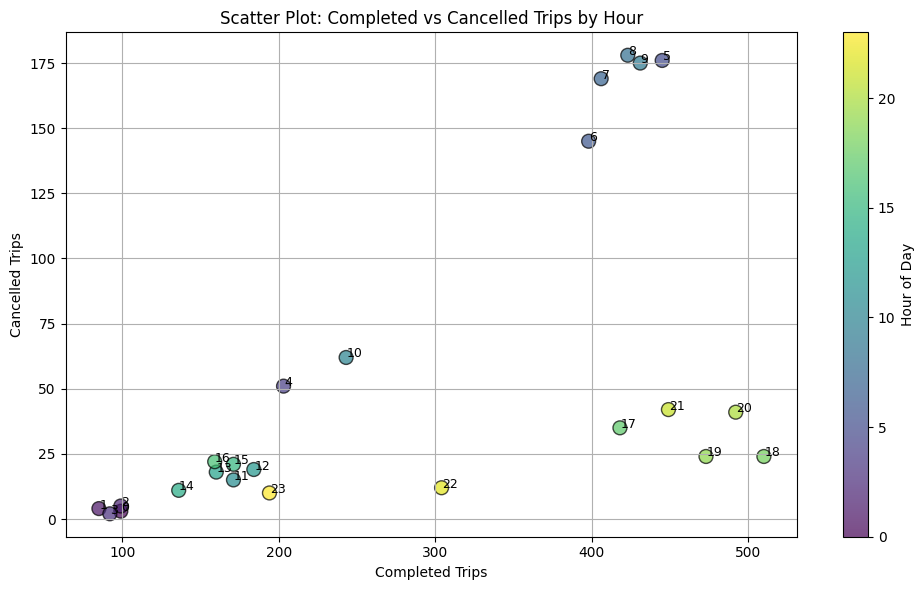

In [ ]:
hours = total_horly_trip['hour']
completed = total_horly_trip['trip_count']
cancelled = total_horly_trip['total_cancelled_trips']

plt.figure(figsize=(10, 6))
plt.scatter(completed, cancelled, c=hours, cmap='viridis', s=100, alpha=0.7, edgecolors='k')

# Optional: Add hour labels to each point
for i, hour in enumerate(hours):
    plt.text(completed[i] + 0.3, cancelled[i], str(hour), fontsize=9)

plt.xlabel('Completed Trips')
plt.ylabel('Cancelled Trips')
plt.title('Scatter Plot: Completed vs Cancelled Trips by Hour')
plt.colorbar(label='Hour of Day')
plt.grid(True)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A scatter plot provides valuable insights into the relationship and behavior of two variables under different conditions, which can significantly impact business performance. In this context, identifying clusters of cancelled and completed trips offers meaningful patterns that can help uncover operational inefficiencies or service gaps. These insights are instrumental in guiding strategic improvements and enhancing overall business effectiveness.



##### 2. What is/are the insight(s) found from the chart?

Morning Peak Hours:
The scatter plot reveals that during the morning peak hours, there is a high volume of both completed and cancelled trips. This suggests that while demand is strong, the service capacity may be strained—likely due to factors such as traffic congestion, driver unavailability, or scheduling inefficiencies during busy hours.

Afternoon and Evening Hours:
Post 10 AM and into the evening, a greater number of trips are successfully completed with fewer cancellations, even though demand remains high. This indicates that the system manages demand more efficiently during these times—possibly due to better fleet availability or more optimized operations.

This comparison highlights areas where performance is inconsistent and suggests the potential for process improvements during morning hours to match the efficiency seen later in the day.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Identifying morning peak hours and optimizing fleet management during this period can significantly enhance the company's revenue. By aligning resource availability with high demand, the business can reduce cancellations, complete more trips, and improve overall service efficiency—leading to increased customer satisfaction and higher profitability.

### CHART 13 : Line chart for fleet per hour

In [ ]:
# Chart - 8 visualization code

## Line chart for fleet unavaibilty

cars_unavailbility_number = df[df['Status'] == 'No Cars Available'].groupby('hour')['Status'].value_counts().reset_index()
cars_unavailbility_number=cars_unavailbility_number.rename(columns={'count':'total'})

In [ ]:
cars_unavailbility_number

,hour,Status,total
0,0,No Cars Available,56
1,1,No Cars Available,56
2,2,No Cars Available,57
3,3,No Cars Available,56
4,4,No Cars Available,74
5,5,No Cars Available,84
6,6,No Cars Available,86
7,7,No Cars Available,63
8,8,No Cars Available,90
9,9,No Cars Available,83


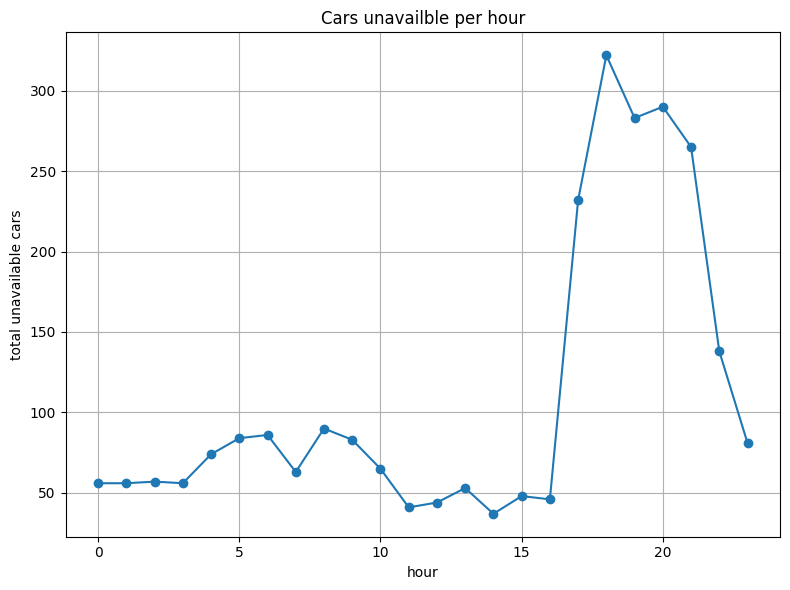

In [ ]:
## line chart

plt.figure(figsize=(8, 6))
plt.plot(cars_unavailbility_number.hour, cars_unavailbility_number.total, marker='o', linestyle='-')
plt.title('Cars unavailble per hour')
plt.xlabel('hour')
plt.ylabel('total unavailable cars')
plt.grid(True)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

In this case, the line chart effectively highlights the trend of lost business due to driver unavailability. By visualizing this pattern over time, it becomes easier to pinpoint when and where the issue is most severe. These insights are crucial for making data-driven decisions aimed at improving driver allocation, reducing unmet demand, and ultimately enhancing overall business growth.

##### 2. What is/are the insight(s) found from the chart?

One notable insight from the chart is that during the evening peak hours, a significant number of trip requests go unattended due to vehicle unavailability. This represents a clear loss of potential business and highlights a critical operational gap. Addressing this issue through better fleet planning and driver availability can lead to improved service delivery and increased revenue.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This chart highlights both positive and negative aspects impacting the business. It is encouraging to see that the fleet availability in the morning and afternoon aligns well with customer demand, ensuring smooth operations during these periods.

However, the high unavailability of cars in the evening—resulting in numerous trip cancellations due to driver busyness—represents a significant challenge. Addressing this gap offers a clear opportunity to improve service levels, capture additional business, and enhance overall operational efficiency.

#### ChART - 14 : Line chart for fleet on day basis

In [ ]:
# Chart - 9 day wise car unavilbility

cars_unavailbility_daily = df[df['Status'] == 'No Cars Available'].groupby('day')['Status'].value_counts().reset_index()
cars_unavailbility_daily=cars_unavailbility_daily.rename(columns={'count':'total'})
cars_unavailbility_daily

,day,Status,total
0,Friday,No Cars Available,580
1,Monday,No Cars Available,504
2,Thursday,No Cars Available,571
3,Tuesday,No Cars Available,505
4,Wednesday,No Cars Available,490


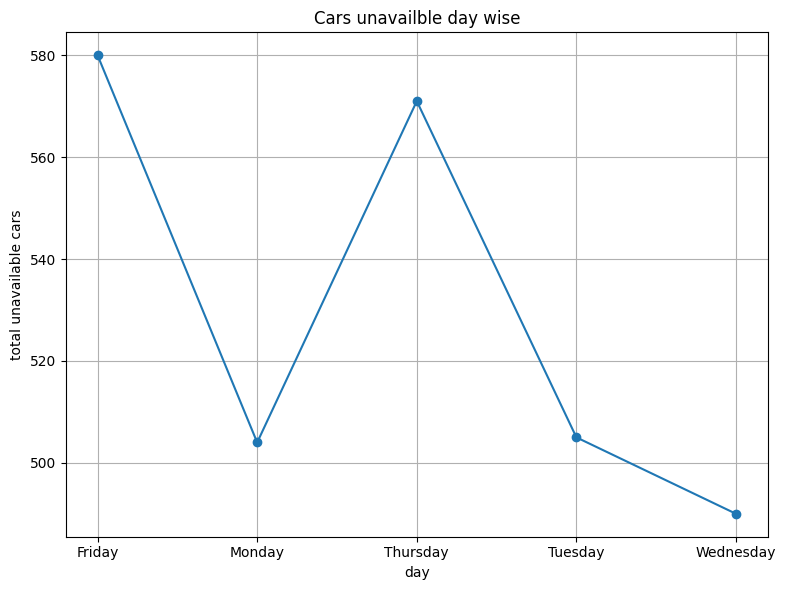

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(cars_unavailbility_daily.day, cars_unavailbility_daily.total, marker='o', linestyle='-')
plt.title('Cars unavailble day wise')
plt.xlabel('day')
plt.ylabel('total unavailable cars')
plt.grid(True)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

In this case, the line chart effectively highlights the trend of lost business resulting from inefficient fleet management. By visualizing this pattern over time, it becomes easier to identify critical periods and locations where the issue is most pronounced, enabling targeted interventions to optimize resource allocation and improve service delivery.

##### 2. What is/are the insight(s) found from the chart?

An important and crucial insight from the analysis is that Friday, a high-demand business day, experiences the highest number of vehicle unavailability incidents, posing a significant concern for sustainable operations. In contrast, Monday, which is also a busy day, faces comparatively fewer issues with car availability. This discrepancy highlights an urgent need to address fleet management specifically for Fridays to maintain service quality and support long-term business growth.  

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Trip cancellations caused by inefficient fleet management pose a significant long-term risk to the business. The most concerning issue is the lack of adequate resources during peak demand periods, which directly results in substantial revenue loss.

If not addressed promptly, this gap may allow competitors to gain an advantage, as dissatisfied customers are more likely to seek alternative service providers. Ensuring optimal fleet availability, especially on high-demand days, is essential to maintaining customer trust, loyalty, and market share.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?


It is recommended that fleet and resource planning be optimized based on demand patterns across different hours of the day and days of the week. This strategic approach will help minimize the risk of lost business opportunities due to operational inefficiencies.

Special attention should be given to high-demand days such as Friday and Monday, where the company is currently unable to meet customer demand effectively. Enhancing resource availability on these peak days can significantly improve service delivery, customer satisfaction, and overall business performance.

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***